In [ ]:
install.packages(c('rpart.plot', 'caret', 'randomForest', 'ROCR', 'xgboost'))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




-  the data could found on https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/data

In [ ]:
library(tidyverse)

library(ROCR)
library(xgboost)
library(rpart)
library(rpart.plot)
library(caret)
library(ggplot2)
library(randomForest)
library(dplyr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


In [ ]:
#loadind data
heart_risk <- read.csv("heart_attack_prediction_dataset.csv", header = TRUE, na.strings = c(""))
head(heart_risk)
tail(heart_risk)


,Patient.ID,Age,Sex,Cholesterol,Blood.Pressure,Heart.Rate,Diabetes,Family.History,Smoking,Obesity,⋯,Sedentary.Hours.Per.Day,Income,BMI,Triglycerides,Physical.Activity.Days.Per.Week,Sleep.Hours.Per.Day,Country,Continent,Hemisphere,Heart.Attack.Risk
,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,BMW7812,67,Male,208,158/88,72,0,0,1,0,⋯,6.615001,261404,31.25123,286,0,6,Argentina,South America,Southern Hemisphere,0
2,CZE1114,21,Male,389,165/93,98,1,1,1,1,⋯,4.963459,285768,27.19497,235,1,7,Canada,North America,Northern Hemisphere,0
3,BNI9906,21,Female,324,174/99,72,1,0,0,0,⋯,9.463426,235282,28.17657,587,4,4,France,Europe,Northern Hemisphere,0
4,JLN3497,84,Male,383,163/100,73,1,1,1,0,⋯,7.648981,125640,36.46470,378,3,4,Canada,North America,Northern Hemisphere,0
5,GFO8847,66,Male,318,91/88,93,1,1,1,1,⋯,1.514821,160555,21.80914,231,1,5,Thailand,Asia,Northern Hemisphere,0
6,ZOO7941,54,Female,297,172/86,48,1,1,1,0,⋯,7.798752,241339,20.14684,795,5,10,Germany,Europe,Northern Hemisphere,1


,Patient.ID,Age,Sex,Cholesterol,Blood.Pressure,Heart.Rate,Diabetes,Family.History,Smoking,Obesity,⋯,Sedentary.Hours.Per.Day,Income,BMI,Triglycerides,Physical.Activity.Days.Per.Week,Sleep.Hours.Per.Day,Country,Continent,Hemisphere,Heart.Attack.Risk
,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>
8758,YDX2478,59,Female,378,93/78,99,0,1,1,1,⋯,7.49523056,70415,39.97606,158,1,9,China,Asia,Northern Hemisphere,0
8759,MSV9918,60,Male,121,94/76,61,1,1,1,0,⋯,10.80637321,235420,19.65589,67,7,7,Thailand,Asia,Northern Hemisphere,0
8760,QSV6764,28,Female,120,157/102,73,1,0,0,1,⋯,3.83303806,217881,23.99387,617,4,9,Canada,North America,Northern Hemisphere,0
8761,XKA5925,47,Male,250,161/75,105,0,1,1,1,⋯,2.37521373,36998,35.40615,527,4,4,Brazil,South America,Southern Hemisphere,1
8762,EPE6801,36,Male,178,119/67,60,1,0,1,0,⋯,0.02910426,209943,27.29402,114,2,8,Brazil,South America,Southern Hemisphere,0
8763,ZWN9666,25,Female,356,138/67,75,1,1,0,0,⋯,9.00523438,247338,32.91415,180,7,4,United Kingdom,Europe,Northern Hemisphere,1


In [ ]:
#summary gives information about data distribution of numeric values(mean(avg),1Q(25%),3Q(75%),Median(50%), min and max(range)), and length of chr data
#there is no NAs or missing value here
summary(heart_risk)


  Patient.ID             Age            Sex             Cholesterol   
 Length:8763        Min.   :18.00   Length:8763        Min.   :120.0  
 Class :character   1st Qu.:35.00   Class :character   1st Qu.:192.0  
 Mode  :character   Median :54.00   Mode  :character   Median :259.0  
                    Mean   :53.71                      Mean   :259.9  
                    3rd Qu.:72.00                      3rd Qu.:330.0  
                    Max.   :90.00                      Max.   :400.0  
 Blood.Pressure       Heart.Rate        Diabetes      Family.History 
 Length:8763        Min.   : 40.00   Min.   :0.0000   Min.   :0.000  
 Class :character   1st Qu.: 57.00   1st Qu.:0.0000   1st Qu.:0.000  
 Mode  :character   Median : 75.00   Median :1.0000   Median :0.000  
                    Mean   : 75.02   Mean   :0.6523   Mean   :0.493  
                    3rd Qu.: 93.00   3rd Qu.:1.0000   3rd Qu.:1.000  
                    Max.   :110.00   Max.   :1.0000   Max.   :1.000  
    Smoking  

In [ ]:
#see the data types, number of rows and columns, and a brief number of data points. it is useful for data preprocessing.
#the target is Heart.Attack.Risk which is bainary.(0,1)
str(heart_risk)
table(heart_risk$Heart.Attack.Risk)

'data.frame':	8763 obs. of  26 variables:
 $ Patient.ID                     : chr  "BMW7812" "CZE1114" "BNI9906" "JLN3497" ...
 $ Age                            : int  67 21 21 84 66 54 90 84 20 43 ...
 $ Sex                            : chr  "Male" "Male" "Female" "Male" ...
 $ Cholesterol                    : int  208 389 324 383 318 297 358 220 145 248 ...
 $ Blood.Pressure                 : chr  "158/88" "165/93" "174/99" "163/100" ...
 $ Heart.Rate                     : int  72 98 72 73 93 48 84 107 68 55 ...
 $ Diabetes                       : int  0 1 1 1 1 1 0 0 1 0 ...
 $ Family.History                 : int  0 1 0 1 1 1 0 0 0 1 ...
 $ Smoking                        : int  1 1 0 1 1 1 1 1 1 1 ...
 $ Obesity                        : int  0 1 0 0 1 0 0 1 1 1 ...
 $ Alcohol.Consumption            : int  0 1 0 1 0 1 1 1 0 1 ...
 $ Exercise.Hours.Per.Week        : num  4.17 1.81 2.08 9.83 5.8 ...
 $ Diet                           : chr  "Average" "Unhealthy" "Healthy" "Average" ...


   0    1 
5624 3139 

- Preproessing:
- Transforming data to the proper type and class.
- checking for missing values, ommitig them, duplicated values, outliers, imputation, scaling.
- Class balancing should be done before training the model. The goal of class balancing is to prevent the machine learning model from being biased towards the majority class during the training phase.
-

In [ ]:
sum(is.na(heart_risk))
print(duplicated_values <- any(duplicated(heart_risk)))
# there is no missing or duplicated value on the data frame.


[1] 0

[1] FALSE


- transforming the data columns which are chr to factor and check their levels.

In [ ]:
#remove extra columns
#Removing column Patient.ID as it is an extra index column
heart_risk$Patient.ID <- NULL

#Removing "Country" column as it is an extra column(it has 20 category)
#this extra and useless data can be proven by feature importance as well.
categories_country <- unique(heart_risk$Country)
categories_country
heart_risk$Country <- NULL

#so removing "Continent" column
heart_risk$Continent <- NULL



[1] "Argentina"      "Canada"         "France"         "Thailand"      
 [5] "Germany"        "Japan"          "Brazil"         "South Africa"  
 [9] "United States"  "Vietnam"        "China"          "Italy"         
[13] "Spain"          "India"          "Nigeria"        "New Zealand"   
[17] "South Korea"    "Australia"      "Colombia"       "United Kingdom"

In [ ]:
#this chunk of code, splites the Blood.Pressure to two numeric data and then add them to the data frame, then delet the Blood pressure from dataset.
#heart_risk$Blood.Pressure <- as.numeric(heart_risk$Blood.Pressure)
# When you have a character field like Blood.Pressure that contains values such as "158/88", and you try to directly convert it to numeric using as.numeric, R cannot interpret the string with a slash as a number, which results in NA values.
#Split the String: Use strsplit or sub to separate the systolic and diastolic parts.
#Convert to Numeric: Apply as.numeric to each part after splitting.
Blood.Pressure_split <- strsplit(heart_risk$Blood.Pressure, "/")
heart_risk$Blood.Pressure.Systolic <- as.numeric(sapply(Blood.Pressure_split, function(x) x[1]))
heart_risk$Blood.Pressure.Diastolic <- as.numeric(sapply(Blood.Pressure_split, function(x) x[2]))
heart_risk$Blood.Pressure <- NULL


str(heart_risk)



'data.frame':	8763 obs. of  24 variables:
 $ Age                            : int  67 21 21 84 66 54 90 84 20 43 ...
 $ Sex                            : chr  "Male" "Male" "Female" "Male" ...
 $ Cholesterol                    : int  208 389 324 383 318 297 358 220 145 248 ...
 $ Heart.Rate                     : int  72 98 72 73 93 48 84 107 68 55 ...
 $ Diabetes                       : int  0 1 1 1 1 1 0 0 1 0 ...
 $ Family.History                 : int  0 1 0 1 1 1 0 0 0 1 ...
 $ Smoking                        : int  1 1 0 1 1 1 1 1 1 1 ...
 $ Obesity                        : int  0 1 0 0 1 0 0 1 1 1 ...
 $ Alcohol.Consumption            : int  0 1 0 1 0 1 1 1 0 1 ...
 $ Exercise.Hours.Per.Week        : num  4.17 1.81 2.08 9.83 5.8 ...
 $ Diet                           : chr  "Average" "Unhealthy" "Healthy" "Average" ...
 $ Previous.Heart.Problems        : int  0 1 1 1 1 1 0 0 0 0 ...
 $ Medication.Use                 : int  0 0 1 0 0 1 0 1 0 0 ...
 $ Stress.Level                   : 

## Outlier

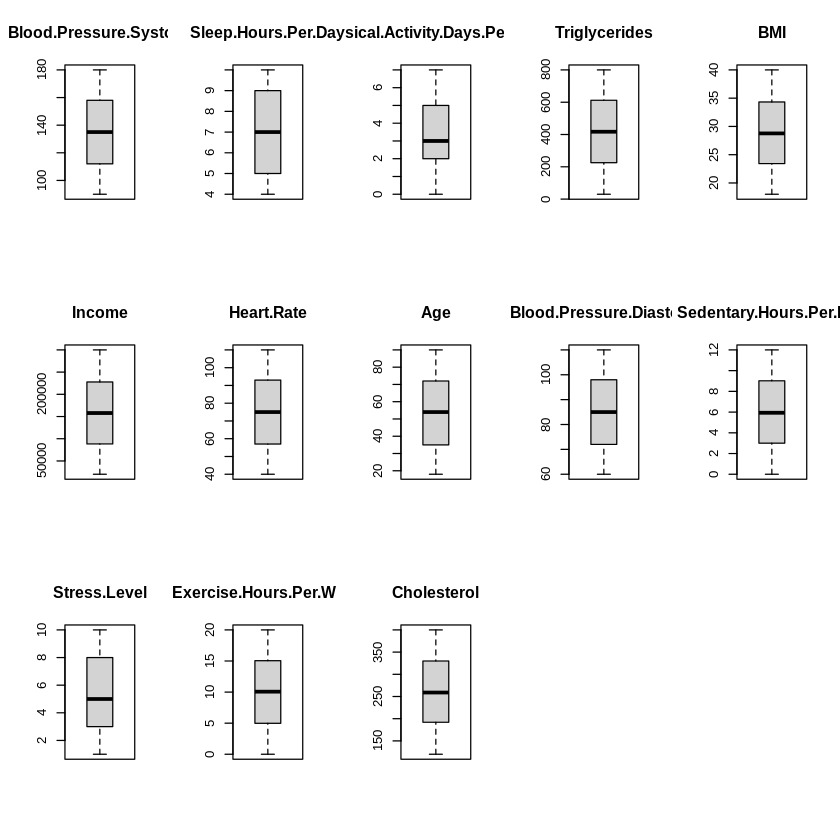

In [ ]:
#checking for any outlier with boxplot
##we do not select the target column and category columns.
# separate numerical columns from data and make sub data
numeric_columns <- c("Blood.Pressure.Systolic","Sleep.Hours.Per.Day",
 "Physical.Activity.Days.Per.Week",
 "Triglycerides", "BMI", "Income", "Heart.Rate",
 "Age", "Blood.Pressure.Diastolic", "Sedentary.Hours.Per.Day",
 "Stress.Level", "Exercise.Hours.Per.Week", "Cholesterol")

# creating subset of numeric values
subdf <- heart_risk[, numeric_columns]

par(mfrow=c(3,5))
for (i in 1:ncol(subdf)) {
  boxplot(subdf[,i], main=names(subdf)[i], type="l")
}

#based on the plots, there is no outlier

In [ ]:
#transforming chr/categorical data to factor
#change Target, which is the dependent variable, to factor
heart_risk$Heart.Attack.Risk<-as.factor(heart_risk$Heart.Attack.Risk)
Target <- as.matrix(heart_risk$Heart.Attack.Risk)

#convert other categorical variables into factor variables
ctego_v <- c("Sex","Stress.Level","Hemisphere",
             "Diet", "Diabetes", "Family.History",
             "Smoking", "Obesity", "Alcohol.Consumption",
             "Previous.Heart.Problems", "Medication.Use" )

heart_risk[ctego_v] <- lapply(heart_risk[ctego_v], factor)
#checking data
str(heart_risk)

'data.frame':	8763 obs. of  24 variables:
 $ Age                            : int  67 21 21 84 66 54 90 84 20 43 ...
 $ Sex                            : Factor w/ 2 levels "Female","Male": 2 2 1 2 2 1 2 2 2 1 ...
 $ Cholesterol                    : int  208 389 324 383 318 297 358 220 145 248 ...
 $ Heart.Rate                     : int  72 98 72 73 93 48 84 107 68 55 ...
 $ Diabetes                       : Factor w/ 2 levels "0","1": 1 2 2 2 2 2 1 1 2 1 ...
 $ Family.History                 : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 1 1 2 ...
 $ Smoking                        : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 2 2 2 2 ...
 $ Obesity                        : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 2 2 2 ...
 $ Alcohol.Consumption            : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 2 2 1 2 ...
 $ Exercise.Hours.Per.Week        : num  4.17 1.81 2.08 9.83 5.8 ...
 $ Diet                           : Factor w/ 3 levels "Average","Healthy",..: 1 3 2 1 3 3 2 1 1 3 ...
 $ Previous.He

## class balance


   0    1 
5624 3139 


        0         1 
0.6417893 0.3582107 

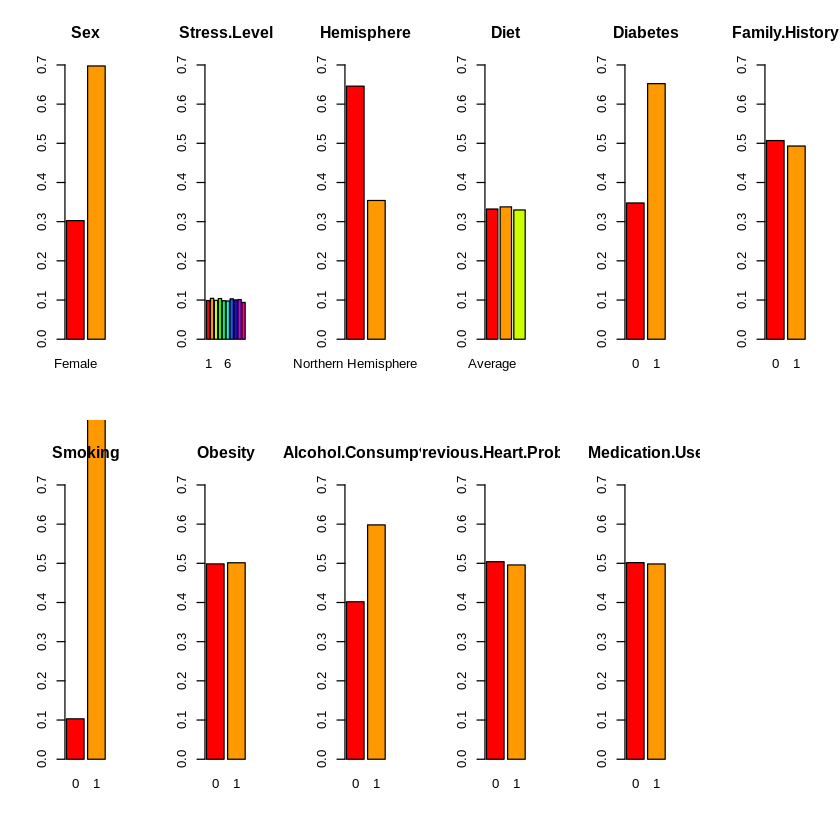

In [ ]:
# "Heart.Attack.Risk" is our target
#seeing the target binary distribution as a table
table(heart_risk$Heart.Attack.Risk)
#and it is clearly an unbalanced distribution.

#Calculating the target binary distribution percentage
#by dividing the values the above table by the total number of rows of the data set
table(heart_risk$Heart.Attack.Risk)/nrow(heart_risk)
#64% are in category one and 36% are in category zero,so it's unbalanced distribution.

# using barplot for showing imbalance
data_c<- heart_risk[ctego_v]

par(mfrow=c(2,6))
for (i in 1:length(data_c)) {
  barplot(prop.table(table(data_c[,i])),
          col = rainbow(10),
          ylim = c(0, 0.7),
          main = names(data_c[i]))
}

#"Sex","Hemisphere", "Continent", "Diabetes",
#"Smoking", "Alcohol.Consumption" are imbalance.



In [ ]:
'''
#balancing data using undersampling
#spliting the data to predictors and target/ X and y
X <- heart_risk[, names(heart_risk) != "Heart.Attack.Risk"]
y <- heart_risk$Heart.Attack.Risk

#appliying the undersampling using function "downSample"
set.seed(123)
down_sampled <- downSample(x = X, y = y)

#visualizing the balanced data after implementing undersampling
undersampled_data <- data.frame(down_sampled$x, Heart.Attack.Risk = down_sampled$y)
''''

ERROR: ignored

## splitting data

In [ ]:
# split the original dataset into a training and testing set and split data into training (80%) and testing set (20%)
set.seed(123)
parts <- createDataPartition(heart_risk$Heart.Attack.Risk, p = .8, list = F)
train <- heart_risk[parts, ]
test <- heart_risk[-parts, ]

In [ ]:
names(train) != "Heart.Attack.Risk"

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE

## feature importance
## random forest

In [ ]:
train$Blood.Pressure

NULL

[[1]]
[1] 0.497541

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 794 446
         1 330 181
                                          
               Accuracy : 0.5568          
                 95% CI : (0.5332, 0.5803)
    No Information Rate : 0.6419          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0051         
                                          
 Mcnemar's Test P-Value : 3.655e-05       
                                          
            Sensitivity : 0.7064          
            Specificity : 0.2887          
         Pos Pred Value : 0.6403          
         Neg Pred Value : 0.3542          
             Prevalence : 0.6419          
         Detection Rate : 0.4535          
   Detection Prevalence : 0.7082          
      Balanced Accuracy : 0.4975          
                                          
       'Positive' Class : 0               
                              

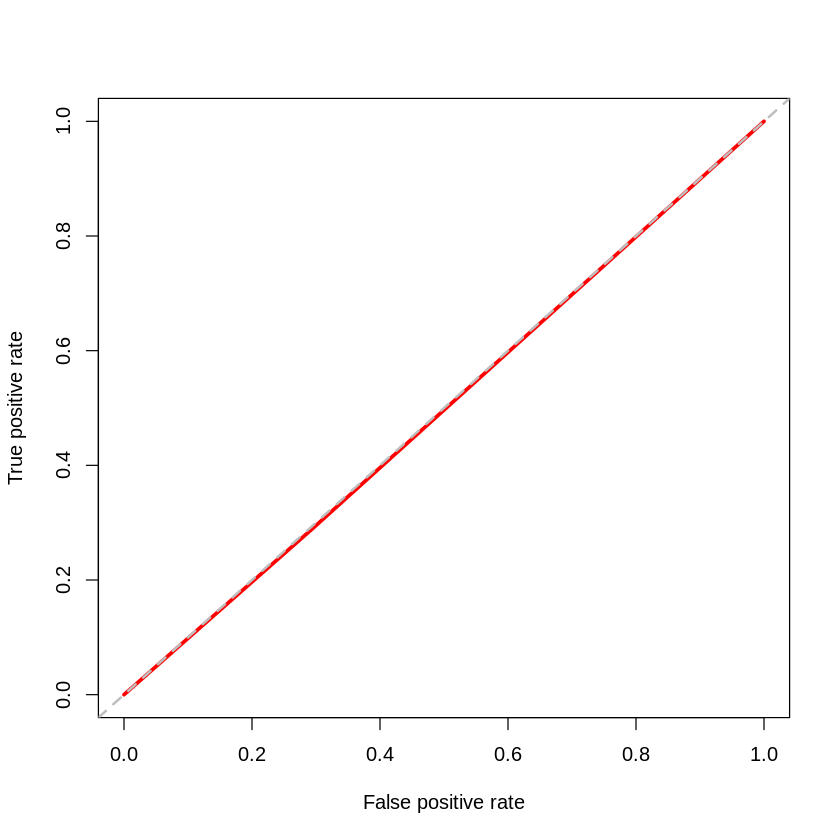

In [ ]:
#Considering that the response variable is binary
#random forest model
set.seed(100)
random_frst <- randomForest(Heart.Attack.Risk ~ .,
                            data=train,importance=T,ntree=5)

y_pred <- predict(random_frst, test[,-22],type="response")
library(ROCR)
preds <- prediction(as.numeric(y_pred ), test$Heart.Attack.Risk)
perf <- performance(preds,"tpr","fpr")
performance(preds,"auc")@y.values
confusionMatrix(y_pred, test$Heart.Attack.Risk)
plot(perf,col='red',lwd=3)
abline(a=0,b=1,lwd=2,lty=2,col="gray")

#Accuracy is 0.6305

Accuracy: 0.5568247 


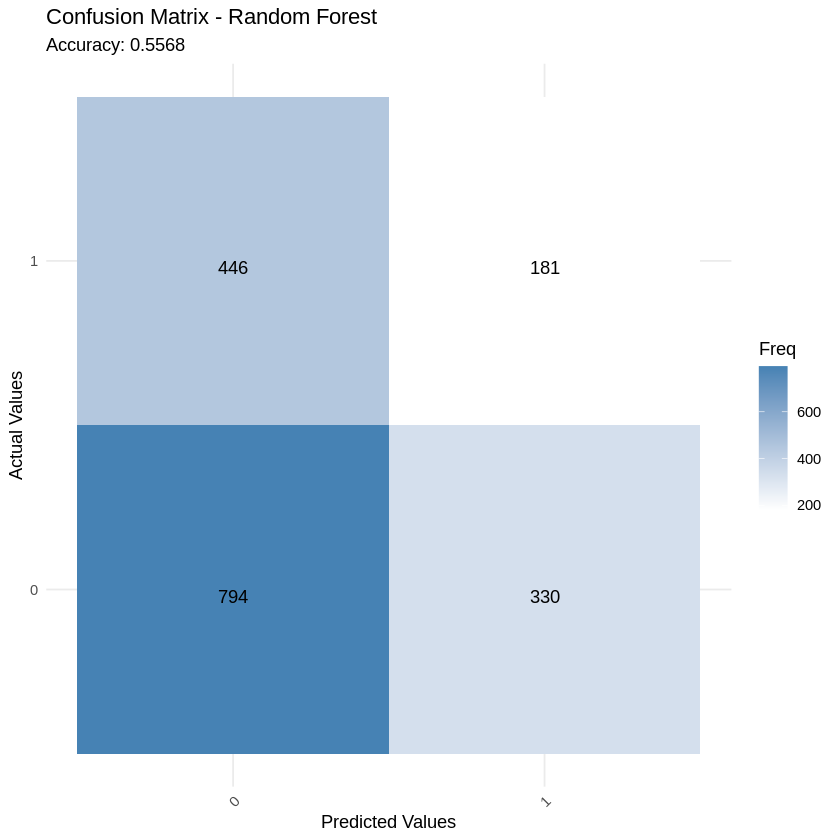

In [ ]:
cm <- confusionMatrix(y_pred, test$Heart.Attack.Risk)

# Extracting the table from the confusion matrix
cm_table <- cm$table

# Convert the matrix to a data frame for plotting
cm_df <- as.data.frame(as.table(cm_table))
colnames(cm_df) <- c("Actual", "Predicted", "Freq")

# Calculate Accuracy
accuracy <- sum(diag(cm_table)) / sum(cm_table)

# Output accuracy
cat("Accuracy:", accuracy, "\n")

# Plotting the confusion matrix
ggplot(cm_df, aes(x = Actual, y = Predicted, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), vjust = 1) +
    scale_fill_gradient(low = "white", high = "steelblue") +
    labs(title = "Confusion Matrix - Random Forest",
         subtitle = paste("Accuracy:", round(accuracy, 4)),
         x = "Predicted Values",
         y = "Actual Values") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


   0    1 
4500 2512 

[[1]]
[1] 0.4986655

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1121  627
         1    3    0
                                          
               Accuracy : 0.6402          
                 95% CI : (0.6172, 0.6627)
    No Information Rate : 0.6419          
    P-Value [Acc > NIR] : 0.5701          
                                          
                  Kappa : -0.0034         
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9973          
            Specificity : 0.0000          
         Pos Pred Value : 0.6413          
         Neg Pred Value : 0.0000          
             Prevalence : 0.6419          
         Detection Rate : 0.6402          
   Detection Prevalence : 0.9983          
      Balanced Accuracy : 0.4987          
                                          
       'Positive' Class : 0               
                        

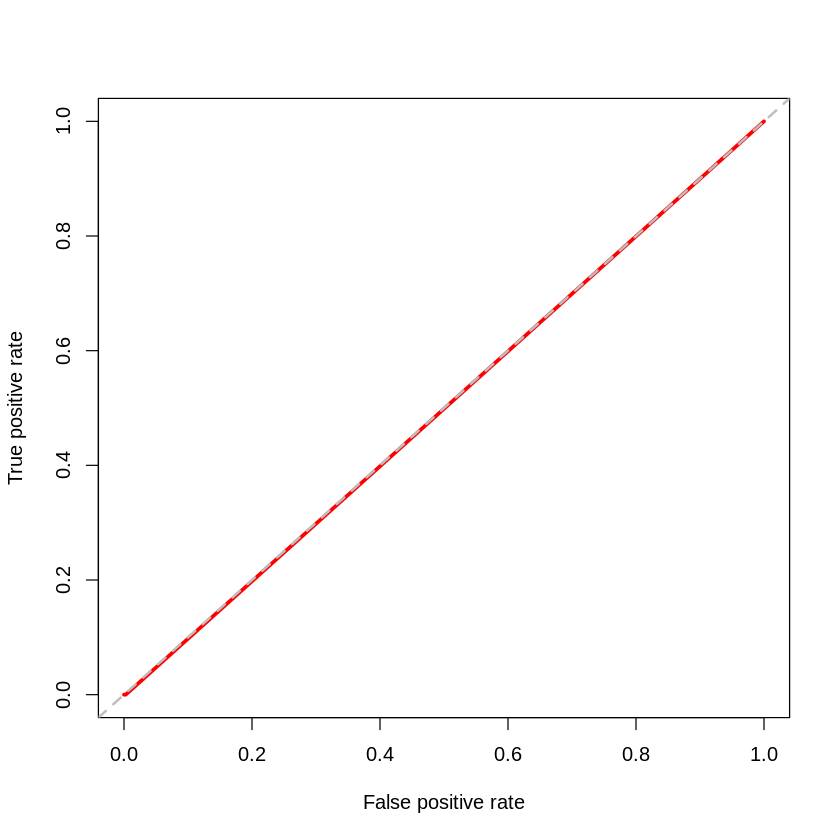

In [ ]:
# Assuming you have the 'randomForest' library loaded and 'train' is your training dataset
library(randomForest)

# Check the class distribution in the training set
table(train$Heart.Attack.Risk)

# Calculate class weights
class_weights <- 1 / table(train$Heart.Attack.Risk)

# Fit random forest model with class weights
set.seed(100)
random_frst <- randomForest(Heart.Attack.Risk ~ .,
                            data = train,
                            importance = TRUE,
                            ntree = 500,  # Increase the number of trees for better performance
                            classwt = class_weights)

# Make predictions on the test set
y_pred <- predict(random_frst, test[,-22], type = "response")

# Evaluate the model
library(ROCR)
preds <- prediction(as.numeric(y_pred), test$Heart.Attack.Risk)
perf <- performance(preds, "tpr", "fpr")
performance(preds, "auc")@y.values
confusionMatrix(y_pred, test$Heart.Attack.Risk)
plot(perf, col = 'red', lwd = 3)
abline(a = 0, b = 1, lwd = 2, lty = 2, col = "gray")


Accuracy: 0.6402056 


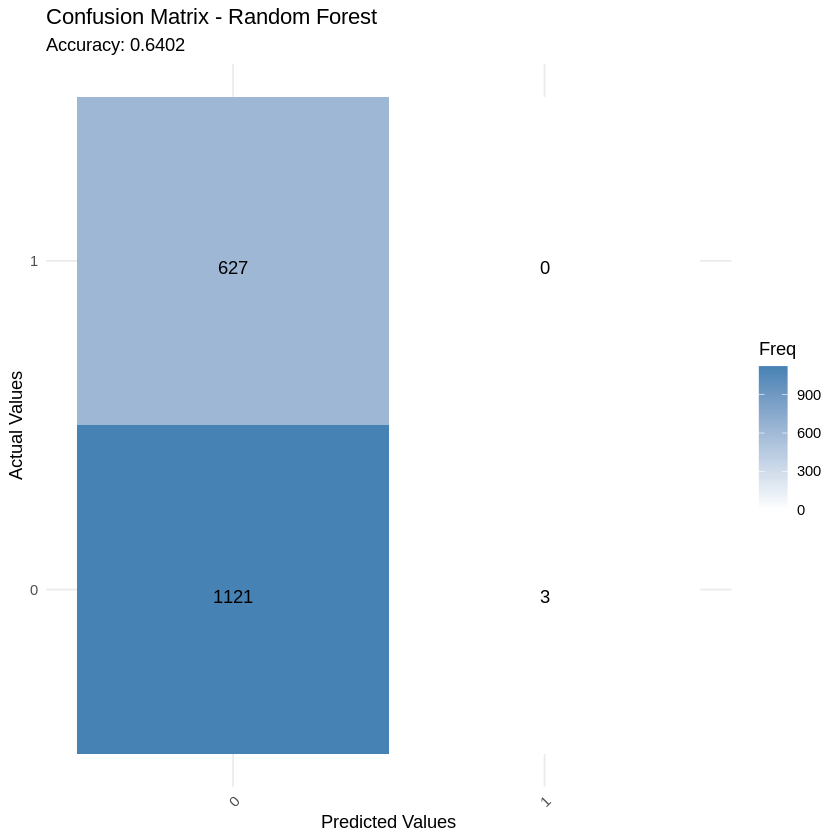

In [ ]:
cm <- confusionMatrix(y_pred, test$Heart.Attack.Risk)

# Extracting the table from the confusion matrix
cm_table <- cm$table

# Convert the matrix to a data frame for plotting
cm_df <- as.data.frame(as.table(cm_table))
colnames(cm_df) <- c("Actual", "Predicted", "Freq")

# Calculate Accuracy
accuracy <- sum(diag(cm_table)) / sum(cm_table)

# Output accuracy
cat("Accuracy:", accuracy, "\n")

# Plotting the confusion matrix
ggplot(cm_df, aes(x = Actual, y = Predicted, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), vjust = 1) +
    scale_fill_gradient(low = "white", high = "steelblue") +
    labs(title = "Confusion Matrix - Random Forest",
         subtitle = paste("Accuracy:", round(accuracy, 4)),
         x = "Predicted Values",
         y = "Actual Values") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

- - Evaluate variable importance


Call:
 randomForest(formula = Heart.Attack.Risk ~ ., data = train, rControl = control,      importance = TRUE, ntree = 50) 
               Type of random forest: classification
                     Number of trees: 50
No. of variables tried at each split: 4

        OOB estimate of  error rate: 39.83%
Confusion matrix:
     0   1 class.error
0 3896 604   0.1342222
1 2189 323   0.8714172

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Age,1.23993193,1.06249118,1.8249180,226.03444
Sex,-1.66710215,0.60651215,-0.8891247,30.00408
Cholesterol,0.20439817,-0.73538659,-0.1915780,235.95149
Heart.Rate,0.26153325,-0.95013471,-0.2285276,216.88802
Diabetes,-0.35787851,-0.41043723,-0.5077069,31.08375
Family.History,1.02576880,-0.92431891,0.3665822,34.41555
Smoking,-0.89266466,-0.93631065,-1.4336839,17.58951
Obesity,0.84141646,1.24942569,1.5914054,32.90561
Alcohol.Consumption,-0.71010236,0.91090846,0.1528779,31.72295
Exercise.Hours.Per.Week,1.14303722,0.66969496,1.3060231,254.86349


Diet                             Age 
                      2.6979836                       1.8249180 
                        Obesity         Exercise.Hours.Per.Week 
                      1.5914054                       1.3060231 
                 Medication.Use        Blood.Pressure.Diastolic 
                      0.8979330                       0.5330648 
                 Family.History         Previous.Heart.Problems 
                      0.3665822                       0.3519459 
                   Stress.Level             Alcohol.Consumption 
                      0.2090434                       0.1528779 
Physical.Activity.Days.Per.Week                     Cholesterol 
                      0.1241875                      -0.1915780 
        Sedentary.Hours.Per.Day                      Heart.Rate 
                     -0.2081188                      -0.2285276 
        Blood.Pressure.Systolic                        Diabetes 
                     -0.2549419                      -0.5077069 
                  Triglycerides             Sleep.Hours.Per.Day 
                     -0.5506848                      -0.6590263 
                            Sex                      Hemisphere 
                     -0.8891247                      -1.1553587 
                            BMI                         Smoking 
                     -1.2562083                      -1.4336839 
                         Income 
                     -2.3946102

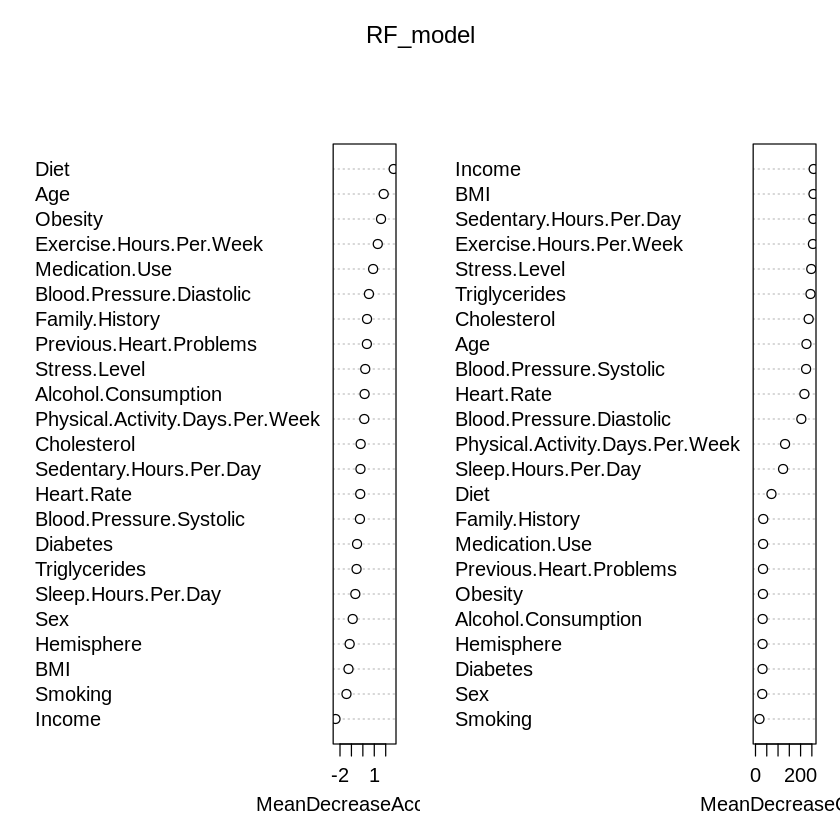

In [ ]:
#feature importance/selection using random forest
# indicates that which variables are important for prediction
set.seed(123)
control<- trainControl(method = "cv", number = 5, verboseIter = FALSE)
RF_model <- randomForest(Heart.Attack.Risk~., data = train ,
                         rControl = control,
                         importance=TRUE,ntree=50)
RF_model

#Evaluate variable importance
importance(RF_model)
varImpPlot(RF_model)
#Higher the value of mean decrease accuracy or
#mean decrease gini score , higher the importance of the variable in the model.

importance_RF<-importance(RF_model)
sort(importance_RF[,3],decreasing = T)

In [ ]:
###run a logistic regression with all features
model_glm<-glm(Heart.Attack.Risk~. , family=binomial, data=train)
summary(model_glm)
#feature with p<0.05 are important.
#see that ‘Age ’,is significance  variable in the base model.
#It’s surprising to see that neither ‘cholesterol’ nor ‘blood pressure’ have any significance in the base model.



Call:
glm(formula = Heart.Attack.Risk ~ ., family = binomial, data = train)

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)                     -7.797e-01  3.221e-01  -2.421   0.0155 *
Age                              6.623e-04  1.323e-03   0.501   0.6166  
SexMale                          6.657e-02  6.532e-02   1.019   0.3081  
Cholesterol                      4.932e-04  3.102e-04   1.590   0.1118  
Heart.Rate                      -9.181e-04  1.214e-03  -0.756   0.4494  
Diabetes1                        7.661e-02  5.271e-02   1.453   0.1461  
Family.History1                 -1.941e-02  5.007e-02  -0.388   0.6984  
Smoking1                        -5.048e-02  1.069e-01  -0.472   0.6367  
Obesity1                        -9.192e-02  5.006e-02  -1.836   0.0664 .
Alcohol.Consumption1            -5.248e-02  5.095e-02  -1.030   0.3030  
Exercise.Hours.Per.Week          6.935e-03  4.344e-03   1.596   0.1104  
DietHealthy                     

In [ ]:
# Predicting on test data
probabilities <- model_glm %>% predict(test[,-22], type = "response")
predicted.classes <- ifelse(probabilities > 0.4, "1", "0")

# Model accuracy
mean(predicted.classes == test$Heart.Attack.Risk)
# classification prediction accuracy is about 64%, which is not good. The misclassification error rate is 36%.


[1] 0.5990862

In [ ]:
#looking at confusion matrix
table(predicted.classes, test$Heart.Attack.Risk)

accuracy <- table(predicted.classes ,test[,22])
sum(diag(accuracy))/sum(accuracy)
# Accuracy :0.6122

                 
predicted.classes   0   1
                0 991 569
                1 133  58

[1] 0.5990862

- Confusion Matrix, plot

Accuracy: 0.5990862 


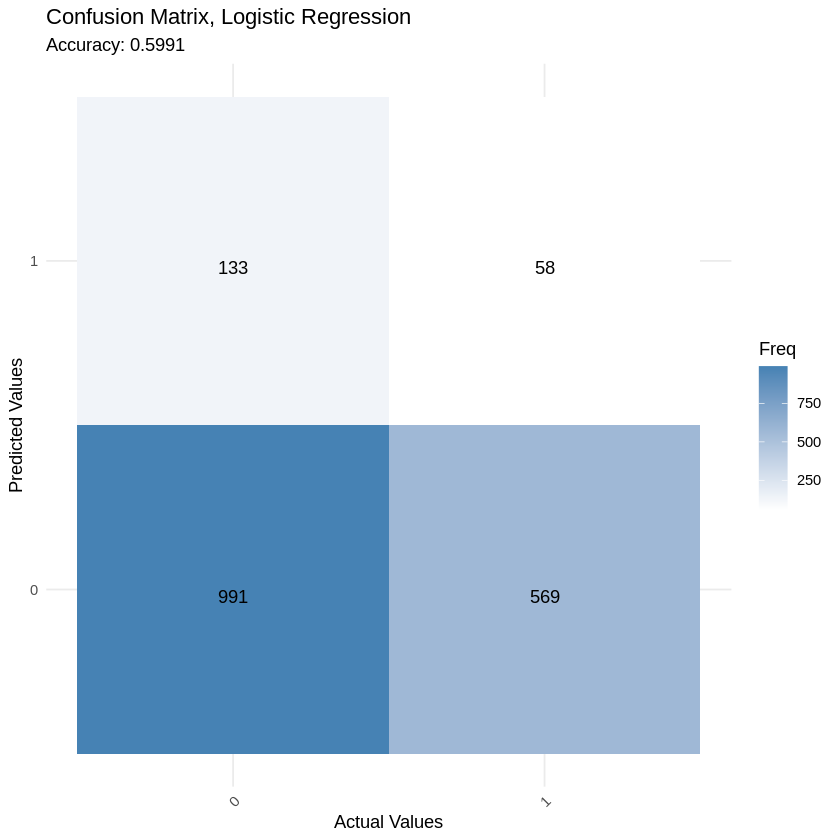

In [ ]:
cm <- table(Predicted = predicted.classes, Actual = test$Heart.Attack.Risk)

# Convert the matrix to a data frame for plotting
cm_df <- as.data.frame(as.table(cm))

# Calculate Accuracy
accuracy <- sum(diag(cm)) / sum(cm)

# Output accuracy
cat("Accuracy:", accuracy, "\n")

# Plotting the confusion matrix
ggplot(cm_df, aes(x = Actual, y = Predicted, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), vjust = 1) +
    scale_fill_gradient(low = "white", high = "steelblue") +
    labs(title = "Confusion Matrix, Logistic Regression", subtitle = paste("Accuracy:", round(accuracy, 4)),
         x = "Actual Values",
         y = "Predicted Values") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

## ROC.l.g

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = FALSE, case = TRUE

Setting direction: controls > cases



NULL

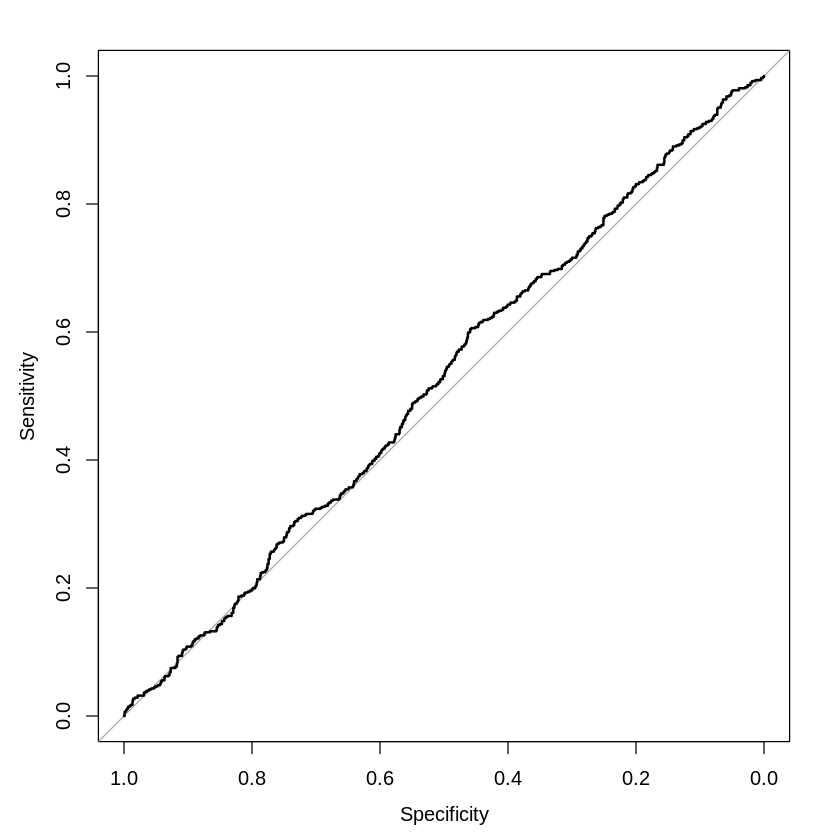

In [ ]:
library(pROC)
plot.roc(x = test$Heart.Attack.Risk== "1", pred = probabilities)$roc.vol

## Support Vector Machines

In [ ]:
set.seed(860)
library(e1071)
library(caret)

# Assuming 'Heart.Attack.Risk' is the response variable in your dataset
# Manually set class weights
custom_class_weights <- c("0" = 0.3, "1" = 1)

# Fit SVM model with custom class weights
svm_model <- svm(Heart.Attack.Risk ~ .,
                 data = train,
                 type = "C-classification",
                 kernel = "linear",
                 class.weights = custom_class_weights)

# Make predictions on the test set
y_pred <- predict(svm_model, newdata = test[-22])

# Evaluate the model
confusionMatrix(y_pred, test$Heart.Attack.Risk)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0    0    0
         1 1124  627
                                         
               Accuracy : 0.3581         
                 95% CI : (0.3356, 0.381)
    No Information Rate : 0.6419         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.0000         
            Specificity : 1.0000         
         Pos Pred Value :    NaN         
         Neg Pred Value : 0.3581         
             Prevalence : 0.6419         
         Detection Rate : 0.0000         
   Detection Prevalence : 0.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : 0              
                                         

In [ ]:
class_weights[2]

[1] 0.1

Confusion Matrix, SVM model

Accuracy: 0.6419189 


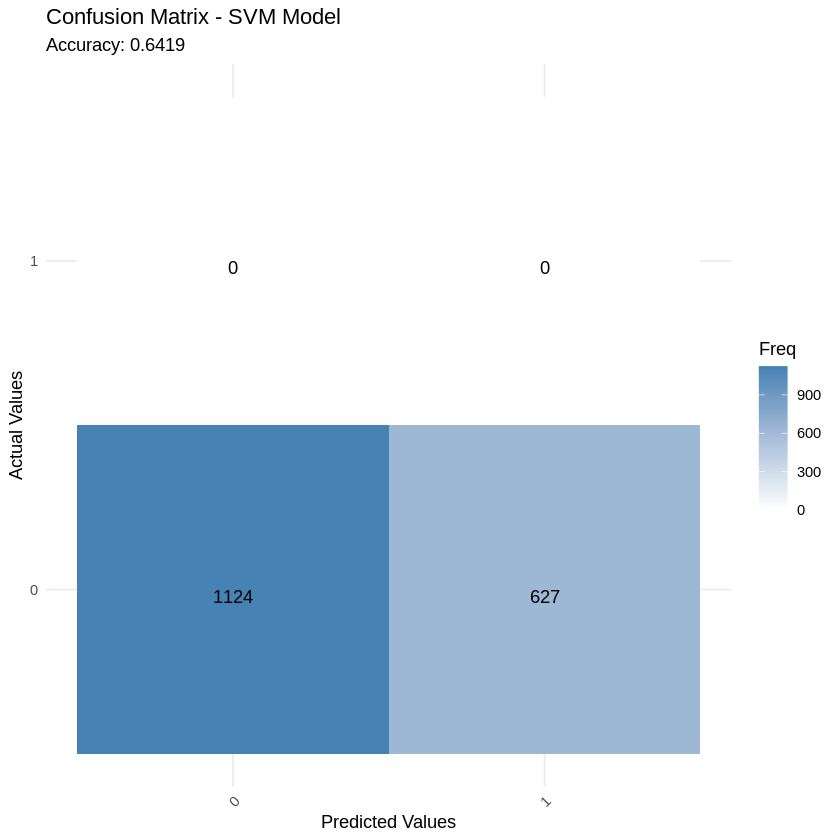

In [ ]:
set.seed(860)
svm_model <- svm(Heart.Attack.Risk ~ ., data = train, type = "C-classification", kernel = "linear")
y_pred <- predict(svm_model, newdata = test[-22])

# Generating the confusion matrix
cm <- confusionMatrix(test[, 22], y_pred)

# Extracting the table from the confusion matrix
cm_table <- cm$table

# Convert the matrix to a data frame for plotting
cm_df <- as.data.frame(as.table(cm_table))
colnames(cm_df) <- c("Actual", "Predicted", "Freq")

# Calculate Accuracy
accuracy <- sum(diag(cm_table)) / sum(cm_table)

# Output accuracy
cat("Accuracy:", accuracy, "\n")

# Plotting the confusion matrix
ggplot(cm_df, aes(x = Actual, y = Predicted, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), vjust = 1) +
    scale_fill_gradient(low = "white", high = "steelblue") +
    labs(title = "Confusion Matrix - SVM Model",
         subtitle = paste("Accuracy:", round(accuracy, 4)),
         x = "Predicted Values",
         y = "Actual Values") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))